### Sentiment Analysis:
**Build a model that can analyze and classify sentiment in text data, such as product reviews or social media posts.**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

import spacy

In [2]:
# Data: Iphone 11 reviews from amazon.com

data = pd.read_csv('apple_iphone_11_reviews.csv')

In [3]:
data.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI


In [4]:
data.tail()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
5005,5005,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-13,Dhamaka,4.0 out of 5 stars,Apple,Shreya,Dhamaka phone
5006,5006,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-15,Goodbye,4.0 out of 5 stars,Apple,murali hv,Good
5007,5007,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-12-29,Nothing,5.0 out of 5 stars,Apple,Manish,Fantabulous phone. Easy to use.
5008,5008,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-10,Superbb,5.0 out of 5 stars,Apple,basil john p,Fantastic
5009,5009,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-05,Nothing,5.0 out of 5 stars,Apple,Amazon Customer,Best purchase


In [5]:
data.shape

(5010, 12)

In [6]:
data['index'].nunique()

5010

In [7]:
data.isna().sum()

index              0
product            0
helpful_count      0
total_comments     0
url                0
review_country     0
reviewed_at        0
review_text        3
review_rating      0
product_company    0
profile_name       0
review_title       2
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(5007, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5007 entries, 0 to 5009
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            5007 non-null   int64 
 1   product          5007 non-null   object
 2   helpful_count    5007 non-null   object
 3   total_comments   5007 non-null   int64 
 4   url              5007 non-null   object
 5   review_country   5007 non-null   object
 6   reviewed_at      5007 non-null   object
 7   review_text      5007 non-null   object
 8   review_rating    5007 non-null   object
 9   product_company  5007 non-null   object
 10  profile_name     5007 non-null   object
 11  review_title     5007 non-null   object
dtypes: int64(2), object(10)
memory usage: 508.5+ KB


In [11]:
len(data.index == data.index.nunique()) == data.shape[0]

True

In [12]:
data.drop(['index'], axis = 1, inplace = True)

In [13]:
# Converting helpful_count to int

def helpfull(x):
    helpful = x.split()[0]
    if helpful == 'One':
        return 1
    elif ',' in helpful:
        return int(helpful.replace(',', ''))
    else:
        return int(helpful)

data['helpful'] = data['helpful_count'].apply(helpfull)


In [14]:
data['rating'] = data.review_rating.apply(lambda x: float(x.split()[0]))

In [15]:
data.rating.value_counts()

rating
5.0    3730
4.0     718
1.0     319
3.0     153
2.0      87
Name: count, dtype: int64

In [16]:
# drop useless columns
data.drop(['helpful_count', 'review_rating', 'url', 'reviewed_at'], axis = 1, inplace = True)

In [17]:
data.head()

,product,total_comments,review_country,review_text,product_company,profile_name,review_title,helpful,rating
0,Apple iPhone XR (64GB) - Black,24,India,NOTE:,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",5087,3.0
1,Apple iPhone XR (64GB) - Black,6,India,Very bad experience with this iPhone xr phone....,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,2822,1.0
2,Apple iPhone XR (64GB) - Black,0,India,Amazing phone with amazing camera coming from ...,Apple,A,Happy with the purchase,1798,5.0
3,Apple iPhone XR (64GB) - Black,14,India,So I got the iPhone XR just today. The product...,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,1366,1.0
4,Apple iPhone XR (64GB) - Black,5,India,I've been an android user all my life until I ...,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,536,5.0


In [18]:
# numeric and categoric data

numeric_data = data.select_dtypes('number').columns
categoric_data = data.select_dtypes('object').columns

print("Numeric Columns:", numeric_data, '\nTotal:', len(numeric_data))
print("\nCategoric Columns:", categoric_data, '\nTotal:', len(categoric_data))

Numeric Columns: Index(['total_comments', 'helpful', 'rating'], dtype='object') 
Total: 3

Categoric Columns: Index(['product', 'review_country', 'review_text', 'product_company',
       'profile_name', 'review_title'],
      dtype='object') 
Total: 6


In [19]:
data[numeric_data].describe()

,total_comments,helpful,rating
count,5007.000000,5007.000000,5007.000000
mean,0.030957,5.419013,4.488516
std,0.589596,125.406026,1.086279
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,24.000000,5087.000000,5.000000


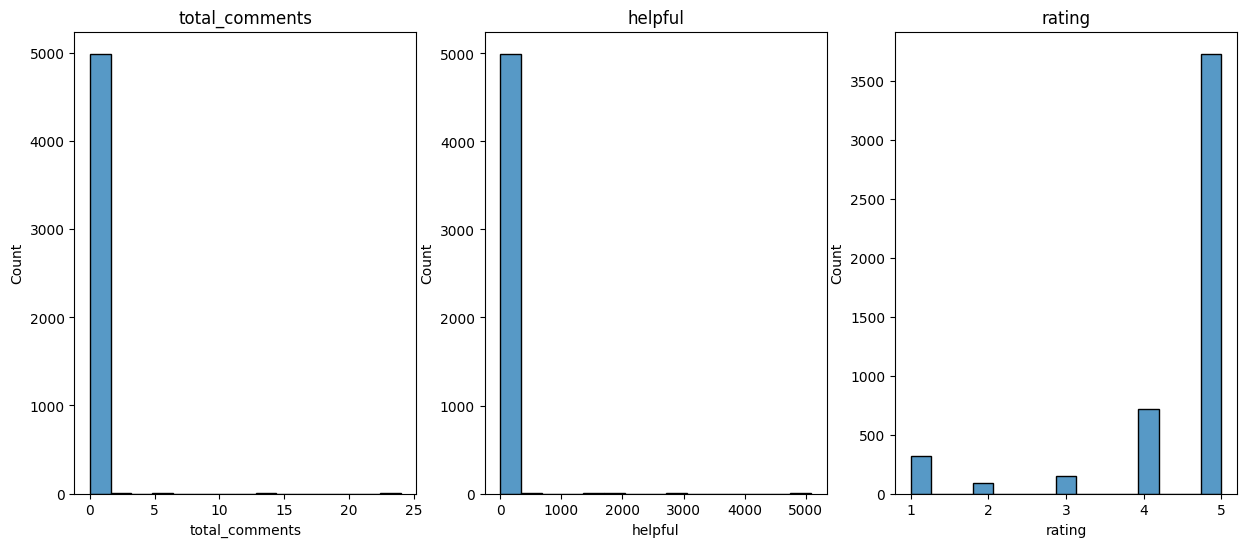

In [20]:
# numeric data visualization

plt.figure(figsize=(15,6))

for idx, col in enumerate(numeric_data):
    plt.subplot(1, 3, idx+1)
    sns.histplot(data[col], bins=15)
    plt.title(col)

<Axes: >

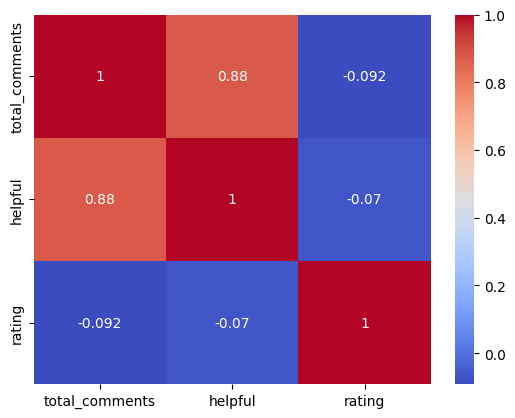

In [21]:
sns.heatmap(data[numeric_data].corr(), annot=True, cmap='coolwarm')

In [22]:
data.total_comments.value_counts()

total_comments
0     4951
1       41
2        5
24       2
6        2
14       2
5        2
3        2
Name: count, dtype: int64

In [23]:
data.helpful.value_counts()

helpful
0       4267
1        515
2        102
3         26
4         12
5         11
9          5
7          4
6          4
15         4
14         3
10         3
19         2
8          2
12         2
35         2
2822       2
5087       2
1798       2
1366       2
536        2
313        2
189        2
164        2
124        2
94         2
54         1
11         1
13         1
88         1
69         1
63         1
18         1
21         1
38         1
17         1
60         1
55         1
25         1
16         1
23         1
62         1
24         1
45         1
26         1
28         1
32         1
53         1
29         1
Name: count, dtype: int64

In [24]:
# total_comments and helpful column doesn't seem useful

data.drop(['helpful', 'total_comments'], axis = 1, inplace = True)

In [25]:
for idx, col in enumerate(categoric_data):
    if col == 'review_text' or col == 'review_title':
        continue
    print(f'{data[col].nunique()} unique values found: {data[col].unique()}')

1 unique values found: ['Apple iPhone XR (64GB) - Black']
1 unique values found: [' India ']
1 unique values found: ['Apple']
4097 unique values found: ['Sameer Patil' 'Amazon Customer' 'A' ... 'Shreya' 'murali hv'
 'basil john p']


In [26]:
# drop other categoric columns

data.drop(['product', 'review_country', 'product_company', 'profile_name'], axis = 1, inplace = True)

In [27]:
data.head()

,review_text,review_title,rating
0,NOTE:,"Which iPhone you should Purchase ? iPhone 8, X...",3.0
1,Very bad experience with this iPhone xr phone....,Don't buy iPhone xr from Amazon.,1.0
2,Amazing phone with amazing camera coming from ...,Happy with the purchase,5.0
3,So I got the iPhone XR just today. The product...,Amazon is not an apple authorised reseller. Pl...,1.0
4,I've been an android user all my life until I ...,Excellent Battery life and buttery smooth UI,5.0


In [28]:
# Merge review_title and review_text columns

data['full_review'] = data['review_title'] + ': ' + data['review_text']

In [29]:
data.drop(['review_title', 'review_text'], axis = 1, inplace = True)

In [30]:
data.head()

,rating,full_review
0,3.0,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1.0,Don't buy iPhone xr from Amazon.: Very bad exp...
2,5.0,Happy with the purchase: Amazing phone with am...
3,1.0,Amazon is not an apple authorised reseller. Pl...
4,5.0,Excellent Battery life and buttery smooth UI: ...


In [31]:
data['full_review'][2863]

'I Phone XR: I am satisfied with the product'

In [32]:
# Sentiment on basis of rating

data['sentiment_on_basis_of_rating'] = np.where(data.rating < 3, 'Negative', np.where(data.rating == 3, 'Neutral', 'Positive'))

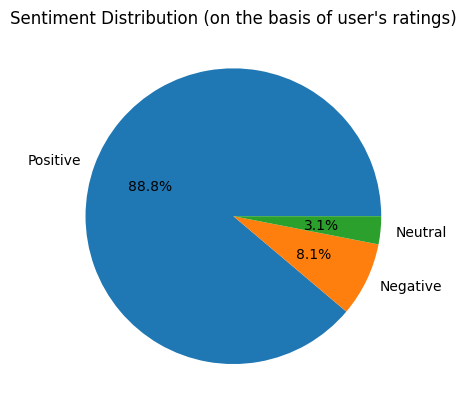

In [33]:
sentiment_counts = data['sentiment_on_basis_of_rating'].value_counts()

labels = sentiment_counts.index
values = sentiment_counts.values

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Sentiment Distribution (on the basis of user's ratings)")
plt.show()

In [34]:
data.tail()

,rating,full_review,sentiment_on_basis_of_rating
5005,4.0,Dhamaka phone: Dhamaka,Positive
5006,4.0,Good: Goodbye,Positive
5007,5.0,Fantabulous phone. Easy to use.: Nothing,Positive
5008,5.0,Fantastic: Superbb,Positive
5009,5.0,Best purchase: Nothing,Positive


In [35]:
nlp = spacy.load('en_core_web_sm')

# used to load the English language model in spaCy

In [36]:
# text cleaning (example)

data['full_review'][405]

'Amazing iPhone model: I purchased this beauty in big billion sale. Thus I got it at a remarkable price. The battery life is good so far and the speed has been pretty good. I love the overall look, size and design of this model a lot. The camera quality is great but definitely the higher version have a better camera quality experience to provide.'

In [37]:
doc = nlp(data['full_review'][405].lower())
for token in doc:
    print(token)

amazing
iphone
model
:
i
purchased
this
beauty
in
big
billion
sale
.
thus
i
got
it
at
a
remarkable
price
.
the
battery
life
is
good
so
far
and
the
speed
has
been
pretty
good
.
i
love
the
overall
look
,
size
and
design
of
this
model
a
lot
.
the
camera
quality
is
great
but
definitely
the
higher
version
have
a
better
camera
quality
experience
to
provide
.


In [38]:
tokens = []
for token in doc:
    if not token.is_stop:
        tokens.append(token)

print(tokens)

[amazing, iphone, model, :, purchased, beauty, big, billion, sale, ., got, remarkable, price, ., battery, life, good, far, speed, pretty, good, ., love, overall, look, ,, size, design, model, lot, ., camera, quality, great, definitely, higher, version, better, camera, quality, experience, provide, .]


In [39]:
tokens = [token for token in tokens if not token.is_punct]
tokens

[amazing,
 iphone,
 model,
 purchased,
 beauty,
 big,
 billion,
 sale,
 got,
 remarkable,
 price,
 battery,
 life,
 good,
 far,
 speed,
 pretty,
 good,
 love,
 overall,
 look,
 size,
 design,
 model,
 lot,
 camera,
 quality,
 great,
 definitely,
 higher,
 version,
 better,
 camera,
 quality,
 experience,
 provide]

In [40]:
tokens = [token.lemma_ for token in tokens]
tokens

['amazing',
 'iphone',
 'model',
 'purchase',
 'beauty',
 'big',
 'billion',
 'sale',
 'get',
 'remarkable',
 'price',
 'battery',
 'life',
 'good',
 'far',
 'speed',
 'pretty',
 'good',
 'love',
 'overall',
 'look',
 'size',
 'design',
 'model',
 'lot',
 'camera',
 'quality',
 'great',
 'definitely',
 'high',
 'version',
 'well',
 'camera',
 'quality',
 'experience',
 'provide']

In [41]:
' '.join(tokens)

'amazing iphone model purchase beauty big billion sale get remarkable price battery life good far speed pretty good love overall look size design model lot camera quality great definitely high version well camera quality experience provide'

In [42]:
# applying to whole column

data['clean_review'] = data['full_review'].apply(lambda x: ' '.join([
    token.lemma_ for token in nlp(x.lower())
    if not token.is_stop and not token.is_punct and not token.is_digit
]))


In [43]:
data.head()

,rating,full_review,sentiment_on_basis_of_rating,clean_review
0,3.0,"Which iPhone you should Purchase ? iPhone 8, X...",Neutral,iphone purchase iphone x xs xr note
1,1.0,Don't buy iPhone xr from Amazon.: Very bad exp...,Negative,buy iphone xr amazon bad experience iphone xr ...
2,5.0,Happy with the purchase: Amazing phone with am...,Positive,happy purchase amazing phone amazing camera co...
3,1.0,Amazon is not an apple authorised reseller. Pl...,Negative,amazon apple authorise reseller note get iphon...
4,5.0,Excellent Battery life and buttery smooth UI: ...,Positive,excellent battery life buttery smooth ui andro...


In [44]:
data.drop(['full_review'], axis = 1, inplace = True)

In [45]:
data.iloc[900:910]

,rating,sentiment_on_basis_of_rating,clean_review
900,5.0,Positive,love ❤ ️ awesome device month secure fast user...
901,5.0,Positive,iphone xr 45k gb good buy
902,5.0,Positive,apple well buy phone phone iphone xr good valu...
903,4.0,Positive,good phone happy phone battery long durability...
904,5.0,Positive,comparison xs affordable iphone speed quality ...
905,5.0,Positive,iphone iphone face d unlock awesome battery ba...
906,5.0,Positive,not need iphone good cam
907,5.0,Positive,expect obviously awesome product
908,5.0,Positive,awesome amazon phone xr deal gb n m happy amaz...
909,5.0,Positive,iphon xr extra r mean real value money get fes...


In [46]:
# sentiment analysis from clean_review

sia = SentimentIntensityAnalyzer()

In [47]:
# Function to get sentiment score for a review
def get_sentiment_score(review):
    sentiment = sia.polarity_scores(review)
    return sentiment['compound']

# Apply sentiment scoring to each review
data['sentiment_score'] = data['clean_review'].apply(get_sentiment_score)

# Categorize sentiment based on score
data['clean_review_sentiment'] = data['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

In [48]:
data.head()

,rating,sentiment_on_basis_of_rating,clean_review,sentiment_score,clean_review_sentiment
0,3.0,Neutral,iphone purchase iphone x xs xr note,0.0000,Neutral
1,1.0,Negative,buy iphone xr amazon bad experience iphone xr ...,-0.8316,Negative
2,5.0,Positive,happy purchase amazing phone amazing camera co...,0.9524,Positive
3,1.0,Negative,amazon apple authorise reseller note get iphon...,0.8591,Positive
4,5.0,Positive,excellent battery life buttery smooth ui andro...,0.9648,Positive


In [49]:
data.drop(['sentiment_on_basis_of_rating'], axis=1, inplace = True)

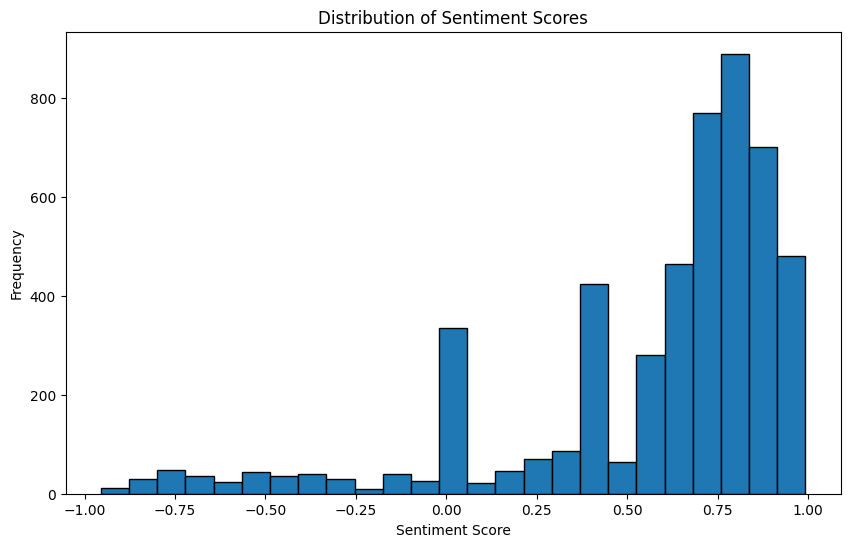

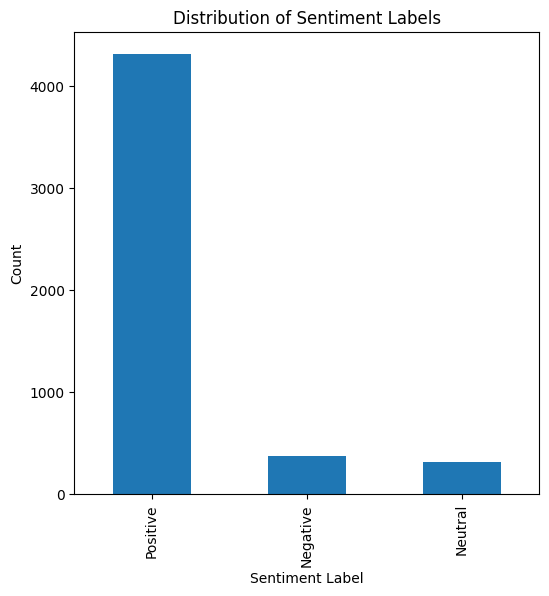

In [50]:
# Distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(data['sentiment_score'], bins=25, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

# Distribution of sentiment labels
plt.figure(figsize=(6, 6))
data['clean_review_sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

In [51]:
# Check the distribution of sentiment labels
sentiment_counts = data['clean_review_sentiment'].value_counts()
print(sentiment_counts)

# Verify a random sample of sentiment labels and reviews
sample = data.sample(n=10, random_state=42)
print(sample[['clean_review', 'clean_review_sentiment']])

# Verify the sentiment scoring for a random sample of reviews
for index, row in sample.iterrows():
    review = row['clean_review']
    sentiment_score = row['sentiment_score']
    sentiment_label = row['clean_review_sentiment']
    print(f"Review: {review}")
    print(f"Sentiment Score: {sentiment_score}")
    print(f"Sentiment Label: {sentiment_label}")
    print("---")

clean_review_sentiment
Positive    4316
Negative     372
Neutral      319
Name: count, dtype: int64
                                           clean_review clean_review_sentiment
3978                                 phone good product               Positive
2086                great phone get phone delivery date               Positive
4491                             great phone nice photo               Positive
3631                      apple think twice value money               Positive
2996                                          good good               Positive
3956                  good term performance camera poor               Negative
584   bad experience product receive good condition ...               Negative
2317  good price.camera need improve supreme iphone ...               Positive
3928                                        great great               Positive
2077  great price iphone great price super delivery ...               Positive
Review: phone good product
Sent

In [52]:
# Calculate average sentiment score
average_sentiment_score = data['sentiment_score'].mean()
print('Average Sentiment Score:', average_sentiment_score)

# Calculate percentage of sentiment labels
sentiment_counts = data['clean_review_sentiment'].value_counts(normalize=True) * 100
print('Sentiment Label Percentage:')
print(sentiment_counts)

Average Sentiment Score: 0.5739030357499502
Sentiment Label Percentage:
clean_review_sentiment
Positive    86.199321
Negative     7.429599
Neutral      6.371080
Name: proportion, dtype: float64


Average Sentiment Score by Rating:
rating
1.0   -0.220858
2.0   -0.061048
3.0    0.177116
4.0    0.568772
5.0    0.673946
Name: sentiment_score, dtype: float64
Sentiment Label Proportions by Rating:
rating  clean_review_sentiment
1.0     Negative                  60.815047
        Positive                  24.764890
        Neutral                   14.420063
2.0     Negative                  42.528736
        Positive                  39.080460
        Neutral                   18.390805
3.0     Positive                  52.287582
        Negative                  26.143791
        Neutral                   21.568627
4.0     Positive                  87.186630
        Neutral                    7.103064
        Negative                   5.710306
5.0     Positive                  93.753351
        Neutral                    4.638070
        Negative                   1.608579
Name: proportion, dtype: float64


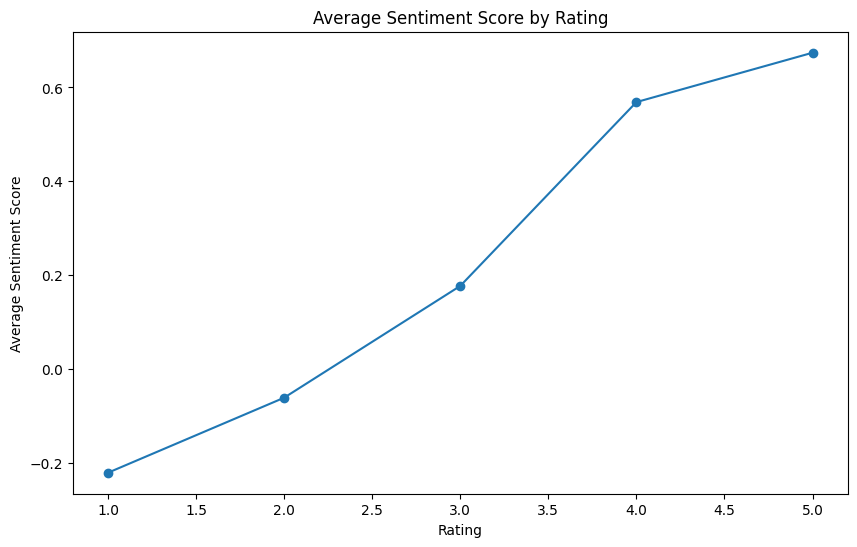

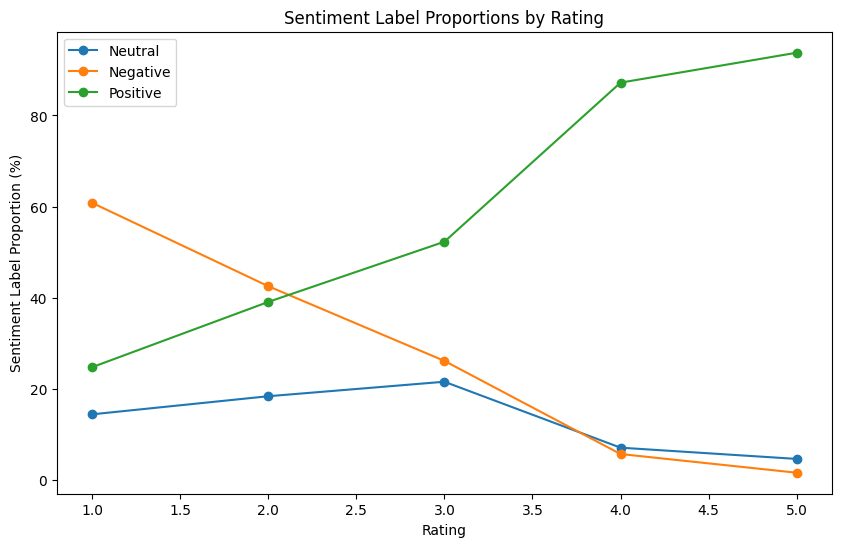

In [53]:
# Group by rating and calculate average sentiment score
avg_sentiment_by_rating = data.groupby('rating')['sentiment_score'].mean()
print('Average Sentiment Score by Rating:')
print(avg_sentiment_by_rating)

# Group by rating and calculate sentiment label proportions
sentiment_counts_by_rating = data.groupby('rating')['clean_review_sentiment'].value_counts(normalize=True) * 100
print('Sentiment Label Proportions by Rating:')
print(sentiment_counts_by_rating)

# Plot average sentiment score by rating
plt.figure(figsize=(10, 6))
plt.plot(avg_sentiment_by_rating.index, avg_sentiment_by_rating.values, marker='o')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Rating')
plt.show()

# Plot sentiment label proportions by rating
plt.figure(figsize=(10, 6))
labels = data['clean_review_sentiment'].unique()
for label in labels:
    plt.plot(sentiment_counts_by_rating.xs(label, level=1).index, sentiment_counts_by_rating.xs(label, level=1).values, marker='o', label=label)
plt.xlabel('Rating')
plt.ylabel('Sentiment Label Proportion (%)')
plt.title('Sentiment Label Proportions by Rating')
plt.legend()
plt.show()


In [54]:
# Calculate the correlation coefficient
correlation = np.corrcoef(data['sentiment_score'], data['rating'])[0, 1]
print('Correlation between Sentiment Score and Rating:', correlation)


Correlation between Sentiment Score and Rating: 0.6083620175213157
